In [128]:
%matplotlib inline
import numpy as np
import keras
from keras.layers import Dense, Input, LSTM, Dropout
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

segLen = 16 ## window size
input_shape = (segLen, 1)


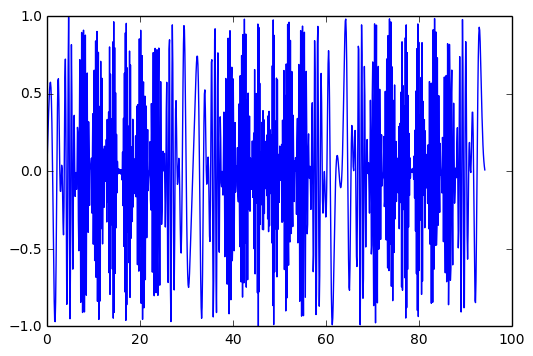

943

In [129]:
x = np.arange(0,np.pi*30, 0.1)
y = np.sin(x)*np.cos(x**2) ## a complex function
plt.plot(x, y)
plt.show()
len(y)

In [130]:
input_seq = []
next_s = []

for i in xrange(0, len(y)-segLen):
    input_seq.append(y[i:i+segLen])
    next_s.append(y[i+segLen])
input_seq = np.expand_dims(np.array(input_seq),-1)
next_s = np.array(next_s)

In [131]:
model = Sequential()
model.add(LSTM(32, recurrent_dropout=0.1, recurrent_regularizer=l2(0.001), input_shape=input_shape, return_sequences=True))
model.add(LSTM(16, recurrent_dropout=0.1, recurrent_regularizer=l2(0.01), return_sequences=True))
model.add(LSTM(16, recurrent_dropout=0.1, recurrent_regularizer=l2(0.01), return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=RMSprop(lr=0.01), loss='mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 16, 32)            4352      
_________________________________________________________________
lstm_31 (LSTM)               (None, 16, 16)            3136      
_________________________________________________________________
lstm_32 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 17        
Total params: 9,617
Trainable params: 9,617
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.fit(input_seq, next_s, epochs=50)

Epoch 1/50
927/927 [==============================] - 10s 11ms/step - loss: 0.3100
Epoch 2/50
927/927 [==============================] - 4s 4ms/step - loss: 0.2517
Epoch 3/50
927/927 [==============================] - 4s 4ms/step - loss: 0.2385
Epoch 4/50
927/927 [==============================] - 4s 4ms/step - loss: 0.2101
Epoch 5/50
927/927 [==============================] - 4s 4ms/step - loss: 0.1521
Epoch 6/50
927/927 [==============================] - 4s 4ms/step - loss: 0.1196
Epoch 7/50
927/927 [==============================] - 4s 4ms/step - loss: 0.0981
Epoch 8/50
927/927 [==============================] - 4s 4ms/step - loss: 0.0901
Epoch 9/50
927/927 [==============================] - 4s 4ms/step - loss: 0.0766
Epoch 10/50
927/927 [==============================] - 4s 4ms/step - loss: 0.0754
Epoch 11/50
927/927 [==============================] - 4s 4ms/step - loss: 0.0630
Epoch 12/50
927/927 [==============================] - 5s 5ms/step - loss: 0.0610
Epoch 13/50
927/927 [==

In [133]:
model.evaluate(input_seq,next_s)

927/927 [==============================] - 2s 2ms/step


0.023306482577015283

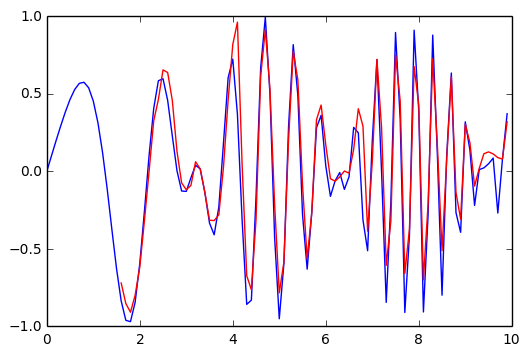

In [134]:
tx = x[:100]
ty = y[:100]
plt.plot(tx, ty, label='ground truth', color='blue')
y_ = []
for i in xrange(0, len(ty)-segLen):
    input_s = np.array(ty[i:i+segLen])
    input_s = np.expand_dims(input_s, -1)
    input_s = np.expand_dims(input_s, 0)
    predicted = model.predict(input_s)[0]
    y_.append(predicted)
plt.plot(tx[segLen:],y_, label='forecast', color='red')

Make RNN great again!

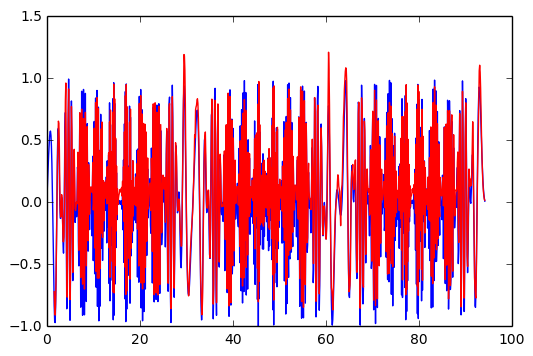

In [135]:
plt.plot(x, y, label='ground truth', color='blue')
y_ = []
for i in xrange(0, len(y)-segLen):
    input_s = np.array(y[i:i+segLen])
    input_s = np.expand_dims(input_s, -1)
    input_s = np.expand_dims(input_s, 0)
    predicted = model.predict(input_s)[0]
    y_.append(predicted)
plt.plot(x[segLen:],y_, label='forecast', color='red')

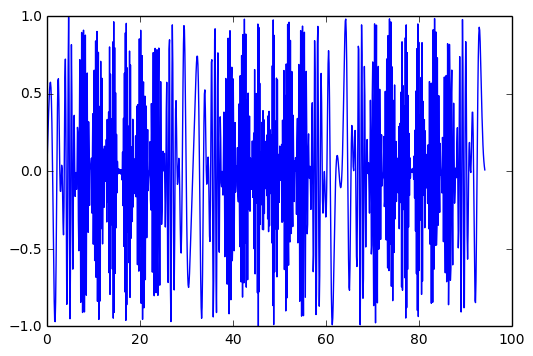

In [136]:
plt.plot(x, y, label='ground truth', color='blue')

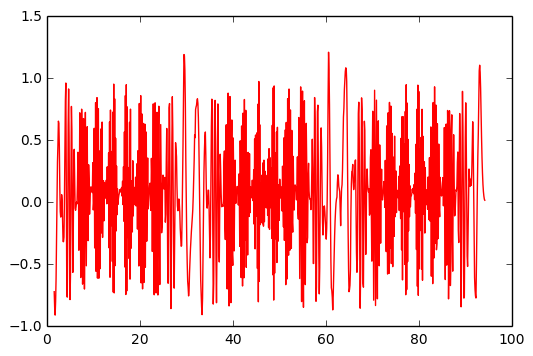

In [137]:
plt.plot(x[segLen:],y_, label='forecast', color='red')